In [35]:
#Se importan las librerías que se usarán en los programas siguientes
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.gridspec as gridspec
import math as mt
from IPython.display import clear_output
from time import sleep
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.

- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [83]:
#Se definen tres series matemáticamente iguales pero que pueden tener diferentes resultados numéricos y se comparan sus 
#resultados tras N iteraciones

def S1(N):
    
    S1n = 0
    for k in range(1,2*N + 1,1):
        an = (-1)**k * k/(k+1)
        S1n += an
    return S1n 

def S2(N):
    S2n = 0
    ST = 0
    S4n = 0
    for i in range(1,N,1):
        an = (2*i-1)/(2*i) 
        bn = + 2*i/(2*i+1)
        S2n += an 
        S4n += bn
    
    return - S2n + S4n

def S3(N):
    S3n = 0
    for i in range(1,N,1):
        an = 1 / (2*i*(2*i+1))
        S3n += an
    return S3n

#Se definen arreglos con los datos obtenidos en cada iteración para las 3 sumatorias
def ana_conver(N):
    f1 = np.zeros(len(N))
    f2 = np.zeros(len(N))
    f3 = np.zeros(len(N))
    
    err1 = np.zeros(len(N))
    err2 = np.zeros(len(N))
    
    for i in range(len(N)):
        f1[i] = S1(N[i])
        f2[i] = S2(N[i])
        f3[i] = S3(N[i])

#Tomando a S3 como la solución exacta se calculan los errores relativos de las otras dos series con respecto a esta
        err1[i] = abs((S1(N[i]) - S3(N[i])) / S3(N[i]))
        err2[i] = abs((S2(N[i]) - S3(N[i])) / S3(N[i]))
        

        gs = gridspec.GridSpec(nrows = 3, ncols = 1, height_ratios = [1, 1, 1])
    
    
    
    fig = plt.figure(figsize = (10, 8))
    
#Se definen los parámetros para realizar gráficos con los datos de los arreglos anteriores que evidencian la convergencia de 
#cada serie
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.plot(N,f1, "D-b", markersize = 4, lw = 1,    label = "$S1$")
    ax0.set_ylabel("Valor de la suma",  fontsize=10)
    ax0.set_xlabel("$n$",  fontsize=20)
    ax0.legend(fontsize = 20, loc = 0)


    ax1 = fig.add_subplot(gs[1, 0])
    ax1.plot(N,f2,  "v-g", lw = 3, label = "$S2$")
    ax1.set_ylabel("Valor de la suma",  fontsize = 10)
    ax1.set_xlabel("$n$",  fontsize = 20)
    ax1.legend(fontsize = 20, loc = 1)

    ax2 = fig.add_subplot(gs[2, 0])
    ax2.plot(N, f3, "o-r", label = "$S3$")
    ax2.set_ylabel("Valor de la suma", fontsize = 10)
    ax2.set_xlabel("$n$",  fontsize = 20)
    ax2.legend(fontsize = 20, loc = 1)

#Se definen los parámetros para realizar gráficos loglog de los errores de las series S1 y S2 relativos a la serie S3
    err = plt.figure(2, figsize = (15,10))
    bx_1 = err.add_subplot(gs[0,0])
    bx_1.plot(N,err1, "D-b", markersize = 4, lw = 1,    label = "$error_1$")
    bx_1.set_yscale('log')
    bx_1.set_xscale('log')
    bx_1.set_ylabel("$error$",  fontsize=10)
    bx_1.set_xlabel("$n$",  fontsize=20)
    bx_1.legend(fontsize = 20, loc = 0)
    
    bx_2 = err.add_subplot(gs[1, 0])
    bx_2.plot(N,err2, "v-g", markersize = 4, lw = 1,    label = "$error_2$")
    bx_2.set_yscale('log')
    bx_2.set_xscale('log')
    bx_2.set_ylabel("$error$",  fontsize=10)
    bx_2.set_xlabel("$n$",  fontsize=20)
    bx_2.legend(fontsize = 20, loc = 0)
    
    fig.show()


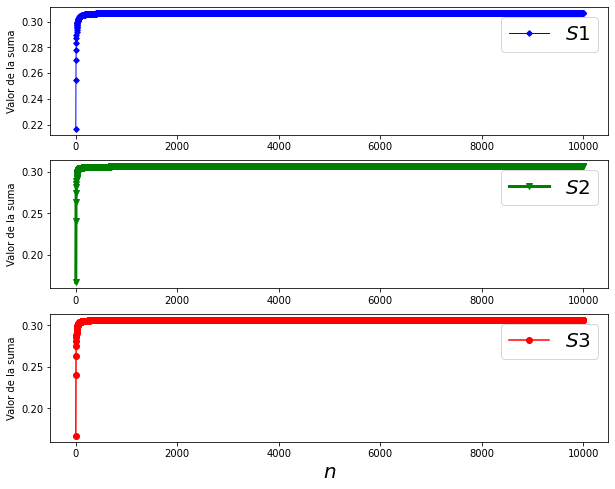

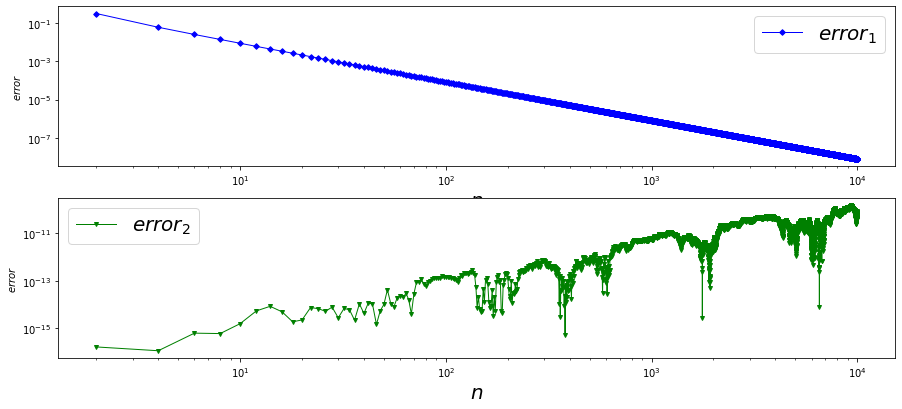

In [87]:
N1 = np.arange(2,10000,2)
ana_conver(N1)

##Análisis

Se puede evidenciar en los graficos que las series $S_N^{(1)}$, $S_N^{(2)}$ y $S_N^{(3)}$ convergen a aproximadamente a la suma de $0.30$.

Por otra parte, al analizar las graficas de los errores se puede ver que el error en $S_N^{(1)}$  muestra una rápida disminución para $N$ pequeño y a medida que $N$ va aumentando el error comenza a disminuir más lento de forma lineal en donde nos entrega aproximadamente seis decimales de presición para $N=10^4$. En la grafica del error de $S_N^{(2)}$ se evidencia que a medida que N aumenta, el error comienza a crecer demanera algo errática, aunque con un aumento lento en promedio lo que indica es que el error de redondeo ha crecido más que el error de aproximación y continuará creciendo al aumentar N, debido a que el $error_{tot} = error_{aprox} + error_{redon}$.

Así que se puede concluir que en la $S_N^{(1)}$ a medida que de tiene más datos menor sera el error total ya que el error aproximado es el más grande de los dos para N relativamente pequeño, ya que finalmente será superado por el error de redondeo que crece lentamentecaso, contrario a lo que pasa con la $S_N^{(2)}$ en donde el error es mayor a medida que se tien más datos.

## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:



    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100

       ```

In [28]:
#Se escribe de tres formas diferentes la misma función
def fx_1(r,x):
    f1 = r*x*(1-x) 
    return f1 

def fx_2(r,x):
    f2 = r*(x - (x**2)) 
    return f2

def fx_3(r,x):
    f3 = r*(x**2)*(x**(1/2) - 1)
    return f3

#Se define una función que grafique los resultados de las tres funciones
def caos(N,r,x0):

#Se realizan arreglos con los datos obtenidos en cada función    
    ite = np.arange(N)
    
    f_1 = np.zeros(N)
    f_2 = np.zeros(N)
    f_3 = np.zeros(N)
    
    a = x0
    b = x0
    c = x0
    
    for i in range(N):
        a = fx_1(r,a)
        f_1[i] = a
        
        
        b = fx_2(r,b)
        f_2[i] = b
       
        
        c = fx_1(r,c)
        f_3[i] = c
        
#Se definen los parámetros para realizar los gráficos    
    fig = plt.figure(figsize = (10, 8))
    gs = gridspec.GridSpec(nrows = 3, ncols = 1, height_ratios = [1, 1, 1])

    ax0 = fig.add_subplot(gs[0, 0])
    ax0.plot(ite,f_1, "D-b", markersize = 4, lw = 1,    label = "$f(x)=rx_n(1-x_n)$")
    ax0.set_ylabel("$f_1(x)$",  fontsize=20)
    ax0.set_xlabel("$n$",  fontsize=20)
    ax0.legend(fontsize = 20, loc = 0)


    ax1 = fig.add_subplot(gs[1, 0])
    ax1.plot(ite, f_2,  "v-g", lw = 3, label = "$f(x)=r(x_n - (x_n)^2)$")
    ax1.set_ylabel("$f_2(x)$",  fontsize = 20)
    ax1.set_xlabel("$n$",  fontsize = 20)
    ax1.legend(fontsize = 20, loc = 1)

    ax2 = fig.add_subplot(gs[2, 0])
    ax2.plot(ite, f_3, "o-r", label = "$f(x)=rx_n^2(x_n^{1/2} - 1) $")
    ax2.set_ylabel("$f_3(x)$", fontsize = 20)
    ax2.set_xlabel("$n$",  fontsize = 20)
    ax2.legend(fontsize = 20, loc = 2)
    
    fig.show()


In [51]:
#Se realizan las graficas interactivas con N=100, r valores en [0,4] y x0 valores en [0,1]
interactive_plot = interactive(caos,N=(100,100), r=(0,4,0.1), x0=(0, 1,0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=100, description='N', min=100), FloatSlider(value=2.0, description='r', …

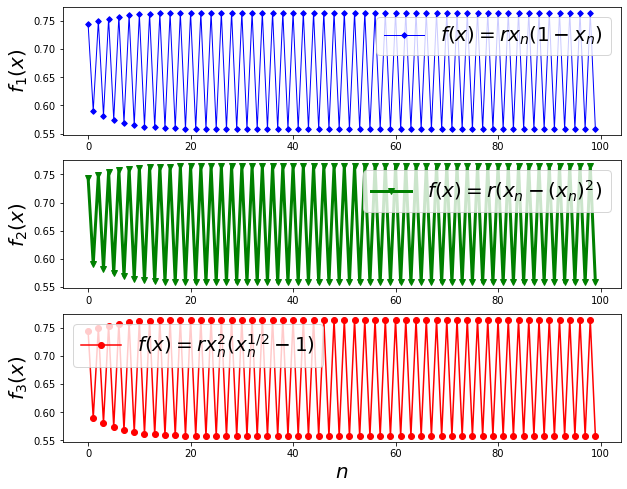

In [53]:
#Grafico para mirar cuando N=1000, r=3.1 y x0=0,6
caos (100,3.1,0.6)